In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scripts.zillow_utils import download_and_process
from functools import reduce

In [2]:
ZHVI_URL = "https://files.zillowstatic.com/research/public_csvs/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv?t=1759012940"
INCOME_URL = "https://files.zillowstatic.com/research/public_csvs/new_homeowner_income_needed/Metro_new_homeowner_income_needed_downpayment_0.20_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv?t=1759012940"
INVENTORY_URL = "https://files.zillowstatic.com/research/public_csvs/invt_fs/Metro_invt_fs_uc_sfrcondo_sm_month.csv?t=1759083781"
RENTAL_URL = "https://files.zillowstatic.com/research/public_csvs/zori/Metro_zori_uc_sfrcondomfr_sm_sa_month.csv?t=1760111959"
SALES_COUNT_URL = "https://files.zillowstatic.com/research/public_csvs/sales_count_now/Metro_sales_count_now_uc_sfrcondo_month.csv?t=1760111959"
DAYS_TO_PENDING_URL = "https://files.zillowstatic.com/research/public_csvs/mean_doz_pending/Metro_mean_doz_pending_uc_sfrcondo_sm_month.csv?t=1760111959"
MARKET_HEAT_INDEX_URL = "https://files.zillowstatic.com/research/public_csvs/market_temp_index/Metro_market_temp_index_uc_sfrcondo_month.csv?t=1760111959"
NEW_CONSTRUCTION_URL = "https://files.zillowstatic.com/research/public_csvs/new_con_sales_count_raw/Metro_new_con_sales_count_raw_uc_sfrcondo_month.csv?t=1760111959"
RENTER_INCOME_NEEDED_URL = "https://files.zillowstatic.com/research/public_csvs/new_renter_income_needed/Metro_new_renter_income_needed_uc_sfrcondomfr_sm_sa_month.csv?t=1760111959"
MORTGAGE_URL = "https://files.zillowstatic.com/research/public_csvs/mortgage_payment/Metro_mortgage_payment_downpayment_0.20_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv?t=1760837661"

In [3]:
zhvi = download_and_process(
  ZHVI_URL,
  "../data_raw/zhvi_metro.csv",
  value_name="HomeValue",
  save_parquet="../data_processed/zhvi_metro_long.parquet"
)

Downloaded: ../data_raw/zhvi_metro.csv


d:\avas\zillow-capstone\scripts\zillow_utils.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.iloc[:, 5:] = df.iloc[:, 5:].interpolate(method='linear', axis=1).fillna(method='bfill', axis=1)


Saved parquet: ../data_processed/zhvi_metro_long.parquet


In [4]:
income = download_and_process(
  INCOME_URL,
  "../data_raw/income_needed_metro.csv",
  value_name="IncomeNeeded",
  save_parquet="../data_processed/income_needed_long.parquet"
)

Downloaded: ../data_raw/income_needed_metro.csv
Saved parquet: ../data_processed/income_needed_long.parquet


d:\avas\zillow-capstone\scripts\zillow_utils.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.iloc[:, 5:] = df.iloc[:, 5:].interpolate(method='linear', axis=1).fillna(method='bfill', axis=1)


In [5]:
rental = download_and_process(RENTAL_URL, "../data_raw/rental_listings.csv", value_name="RentValue", 
                              save_parquet="../data_processed/rental_long.parquet")
sales_count = download_and_process(
  SALES_COUNT_URL,
  "../data_raw/sales_count.csv",
  value_name="SalesCount",
  save_parquet="../data_processed/sales_count_long.parquet"
)
days_pending = download_and_process(
  DAYS_TO_PENDING_URL,
  "../data_raw/days_to_pending.csv",
  value_name="DaysToPending",
  save_parquet="../data_processed/days_to_pending.parquet"
)
market_heat = download_and_process(
  MARKET_HEAT_INDEX_URL,
  "../data_raw/market_heat_index.csv",
  value_name="MarketHeatIndex",
  save_parquet="../data_processed/maket_heat_index.parquet"
)
new_construction = download_and_process(
  NEW_CONSTRUCTION_URL,
  "../data_raw/new_construction.csv",
  value_name="NewConstruction",
  save_parquet="../data_processed/new_construction_long.parquet"
)
renter_income_needed = download_and_process(
  RENTER_INCOME_NEEDED_URL,
  "../data_raw/renter_income.csv",
  value_name="RenterIncomeNeeded",
  save_parquet="../data_processed/renter_income_needed_long.parquet"
)
mortgage_payment = download_and_process(MORTGAGE_URL, "../data_raw/mortgage.csv", value_name="MortgageValue", 
                                        save_parquet="../data_processed/mortgage_long.parquet")


Downloaded: ../data_raw/rental_listings.csv
Saved parquet: ../data_processed/rental_long.parquet


d:\avas\zillow-capstone\scripts\zillow_utils.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.iloc[:, 5:] = df.iloc[:, 5:].interpolate(method='linear', axis=1).fillna(method='bfill', axis=1)


Downloaded: ../data_raw/sales_count.csv
Saved parquet: ../data_processed/sales_count_long.parquet


d:\avas\zillow-capstone\scripts\zillow_utils.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.iloc[:, 5:] = df.iloc[:, 5:].interpolate(method='linear', axis=1).fillna(method='bfill', axis=1)


Downloaded: ../data_raw/days_to_pending.csv
Saved parquet: ../data_processed/days_to_pending.parquet


d:\avas\zillow-capstone\scripts\zillow_utils.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.iloc[:, 5:] = df.iloc[:, 5:].interpolate(method='linear', axis=1).fillna(method='bfill', axis=1)


Downloaded: ../data_raw/market_heat_index.csv
Saved parquet: ../data_processed/maket_heat_index.parquet


d:\avas\zillow-capstone\scripts\zillow_utils.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.iloc[:, 5:] = df.iloc[:, 5:].interpolate(method='linear', axis=1).fillna(method='bfill', axis=1)


Downloaded: ../data_raw/new_construction.csv
Saved parquet: ../data_processed/new_construction_long.parquet


d:\avas\zillow-capstone\scripts\zillow_utils.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.iloc[:, 5:] = df.iloc[:, 5:].interpolate(method='linear', axis=1).fillna(method='bfill', axis=1)


Downloaded: ../data_raw/renter_income.csv
Saved parquet: ../data_processed/renter_income_needed_long.parquet


d:\avas\zillow-capstone\scripts\zillow_utils.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.iloc[:, 5:] = df.iloc[:, 5:].interpolate(method='linear', axis=1).fillna(method='bfill', axis=1)


Downloaded: ../data_raw/mortgage.csv
Saved parquet: ../data_processed/mortgage_long.parquet


d:\avas\zillow-capstone\scripts\zillow_utils.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.iloc[:, 5:] = df.iloc[:, 5:].interpolate(method='linear', axis=1).fillna(method='bfill', axis=1)


In [6]:
inventory = download_and_process(
  INVENTORY_URL,
  "../data_raw/inventory_listings.csv",
  value_name="Inventory",
  save_parquet="../data_processed/inventory_long.parquet"
)

Downloaded: ../data_raw/inventory_listings.csv
Saved parquet: ../data_processed/inventory_long.parquet


d:\avas\zillow-capstone\scripts\zillow_utils.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.iloc[:, 5:] = df.iloc[:, 5:].interpolate(method='linear', axis=1).fillna(method='bfill', axis=1)


In [7]:
renter_income_needed

,RegionID,RegionName,StateName,Date,RenterIncomeNeeded
0,394913,"New York, NY",NY,2015-01-31,93591.020647
1,753899,"Los Angeles, CA",CA,2015-01-31,71654.413039
2,394463,"Chicago, IL",IL,2015-01-31,54849.462481
3,394514,"Dallas, TX",TX,2015-01-31,43438.358495
4,394692,"Houston, TX",TX,2015-01-31,49255.555104
...,...,...,...,...,...
50434,394787,"Lewiston, ID",ID,2025-09-30,58588.888889
50435,394570,"Enid, OK",OK,2025-09-30,45572.364672
50436,395199,"Walla Walla, WA",WA,2025-09-30,56909.066144
50437,394444,"Carson City, NV",NV,2025-09-30,79832.307692


In [8]:
merged = pd.merge(
  zhvi, income,
  on=["RegionID","RegionName","StateName","Date"],
  how="inner"
)

In [9]:
merged_full = pd.merge(
  merged, inventory,
  on=["RegionID","RegionName","StateName","Date"],
  how="inner"
)

In [10]:
dfs = [zhvi, income, inventory, days_pending, rental, renter_income_needed, market_heat, sales_count, 
       new_construction, mortgage_payment]

merged = reduce(lambda left, right: pd.merge(
    left, right,
    on=["RegionID", "RegionName", "StateName", "Date"],
    how="inner"
), dfs)
merged.head(10)

,RegionID,RegionName,StateName,Date,HomeValue,IncomeNeeded,Inventory,DaysToPending,RentValue,RenterIncomeNeeded,MarketHeatIndex,SalesCount,NewConstruction,MortgageValue
0,394913,"New York, NY",NY,2018-03-31,482269.475840,124193.077292,73707.0,68.0,2521.168290,100846.731603,55.0,14084.0,609.0,1942.054265
1,753899,"Los Angeles, CA",CA,2018-03-31,618194.691541,129479.246910,21998.0,35.0,2148.198319,85927.932741,67.0,9761.0,613.0,2489.412449
2,394463,"Chicago, IL",IL,2018-03-31,233818.742817,62023.783139,38581.0,51.0,1492.909505,59716.380184,51.0,10910.0,436.0,941.566301
3,394514,"Dallas, TX",TX,2018-03-31,243061.590286,62285.522762,24042.0,46.0,1258.705833,50348.233318,58.0,7680.0,2322.0,978.786387
4,394692,"Houston, TX",TX,2018-03-31,211385.236359,56713.551717,25618.0,49.0,1315.219802,52608.792091,51.0,6694.0,1939.0,851.228660
5,395209,"Washington, DC",VA,2018-03-31,411006.059404,91319.680742,20262.0,53.0,1839.274777,73570.991081,57.0,7337.0,1387.0,1655.083124
6,394974,"Philadelphia, PA",PA,2018-03-31,236979.293939,59660.074220,24796.0,60.0,1333.444314,53337.772543,43.0,6884.0,549.0,954.293546
7,394856,"Miami, FL",FL,2018-03-31,278537.108310,69003.154231,55444.0,59.0,1637.319367,65492.774677,39.0,10592.0,1135.0,1121.642995
8,394347,"Atlanta, GA",GA,2018-03-31,223653.134150,51572.585780,25097.0,40.0,1228.035925,49121.437013,55.0,10369.0,2623.0,900.630342
9,394404,"Boston, MA",MA,2018-03-31,472803.854092,108908.020354,9067.0,34.0,2184.409601,87376.384043,76.0,3701.0,540.0,1903.937087


In [11]:
merged.to_parquet("../data_processed/full_dataset_mortgage.parquet")

In [12]:
merged_full.head()

,RegionID,RegionName,StateName,Date,HomeValue,IncomeNeeded,Inventory
0,394913,"New York, NY",NY,2018-03-31,482269.475840,124193.077292,73707.0
1,753899,"Los Angeles, CA",CA,2018-03-31,618194.691541,129479.246910,21998.0
2,394463,"Chicago, IL",IL,2018-03-31,233818.742817,62023.783139,38581.0
3,394514,"Dallas, TX",TX,2018-03-31,243061.590286,62285.522762,24042.0
4,394692,"Houston, TX",TX,2018-03-31,211385.236359,56713.551717,25618.0


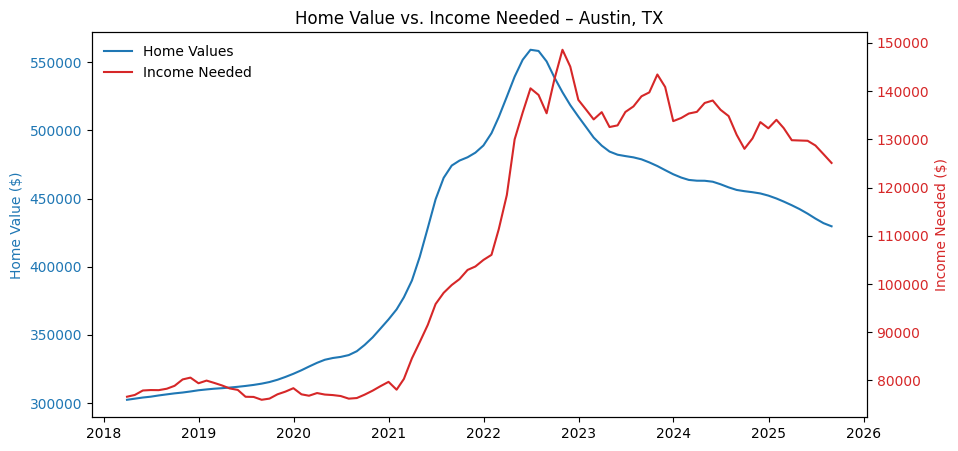

In [13]:
metro = "Austin, TX"
df_metro = merged[merged["RegionName"] == metro]

fig, ax1 = plt.subplots(figsize=(10,5))
line1, = ax1.plot(df_metro["Date"], df_metro["HomeValue"], color="tab:blue", label="Home Values")
ax1.set_ylabel("Home Value ($)", color="tab:blue")
ax1.tick_params(axis='y', labelcolor="tab:blue")

ax2 = ax1.twinx()
line2, = ax2.plot(df_metro["Date"], df_metro["IncomeNeeded"], color="tab:red", label="Income Needed")
ax2.set_ylabel("Income Needed ($)", color="tab:red")
ax2.tick_params(axis='y', labelcolor="tab:red")

lines = [line1, line2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', frameon=False)

plt.title(f"Home Value vs. Income Needed – {metro}")
plt.show()


In [14]:
merged_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35399 entries, 0 to 35398
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   RegionID      35399 non-null  int64         
 1   RegionName    35399 non-null  object        
 2   StateName     35399 non-null  object        
 3   Date          35399 non-null  datetime64[ns]
 4   HomeValue     35399 non-null  float64       
 5   IncomeNeeded  35399 non-null  float64       
 6   Inventory     35399 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 1.9+ MB


In [15]:
print(merged_full[["HomeValue","IncomeNeeded","Inventory"]].describe())

          HomeValue   IncomeNeeded     Inventory
count  3.539900e+04   35399.000000  35399.000000
mean   2.862903e+05   69075.647102   2521.391918
std    1.619536e+05   39237.308393   5649.358264
min    6.873390e+04   18598.775573     89.000000
25%    1.839469e+05   43366.050160    472.000000
50%    2.423851e+05   58978.250292    891.000000
75%    3.376038e+05   83389.753413   2058.000000
max    1.620837e+06  412421.682787  97260.000000


In [16]:
def build_features(df_metro):
  df_metro = df_metro.sort_values("Date").copy()
  df_metro["HomeValue_lag1"] = df_metro["HomeValue"].shift(1)
  df_metro["Inventory_lag1"] = df_metro["Inventory"].shift(1)
  df_metro["RentValue_lag1"] = df_metro["RentValue"].shift(1)
  df_metro["MarketHeatIndex_lag1"] = df_metro["MarketHeatIndex"].shift(1)
  df_metro["HomeValue_roll3"] = df_metro["HomeValue"].rolling(3).mean()
  df_metro["Inventory_roll3"] = df_metro["Inventory"].rolling(3).mean()
  df_metro["RentValue_roll3"] = df_metro["RentValue"].rolling(3).mean()
  df_metro["MarketHeatIndex_roll3"] = df_metro["MarketHeatIndex"].rolling(3).mean()
  return df_metro.dropna().reset_index(drop=True)

In [17]:
dfs = []

for metro, subdf in merged.groupby("RegionName"):
  dfs.append(build_features(subdf))

all_features = pd.concat(dfs, ignore_index=True)

In [18]:
all_features.head(5)

,RegionID,RegionName,StateName,Date,HomeValue,IncomeNeeded,Inventory,DaysToPending,RentValue,RenterIncomeNeeded,...,NewConstruction,MortgageValue,HomeValue_lag1,Inventory_lag1,RentValue_lag1,MarketHeatIndex_lag1,HomeValue_roll3,Inventory_roll3,RentValue_roll3,MarketHeatIndex_roll3
0,394304,"Akron, OH",OH,2018-05-31,141222.614113,37047.184334,3632.0,58.0,810.850885,32434.035381,...,79.0,578.230936,140534.856845,3385.0,811.126946,43.0,140507.606961,3405.000000,810.611908,42.666667
1,394304,"Akron, OH",OH,2018-06-30,141720.548498,37137.543570,3806.0,55.0,812.803919,32512.156767,...,68.0,579.186971,141222.614113,3632.0,810.850885,44.0,141159.339818,3607.666667,811.593916,42.666667
2,394304,"Akron, OH",OH,2018-07-31,142231.927700,37152.676471,3917.0,54.0,812.604899,32504.195974,...,71.0,578.395359,141720.548498,3806.0,812.803919,41.0,141725.030104,3785.000000,812.086568,41.666667
3,394304,"Akron, OH",OH,2018-08-31,142828.303623,37356.721185,3968.0,53.0,814.831361,32593.254426,...,71.0,582.351584,142231.927700,3917.0,812.604899,40.0,142260.259941,3897.000000,813.413393,39.333333
4,394304,"Akron, OH",OH,2018-09-30,143564.616358,37745.741507,3918.0,56.0,817.904047,32716.161876,...,57.0,590.669795,142828.303623,3968.0,814.831361,37.0,142874.949227,3934.333333,815.113436,37.000000


In [19]:
all_features.to_parquet("../data_processed/all_features_mortgage.parquet")